# Paradoxo de Simpson
O paradoxo de Simpson é um fenômeno em probabilidade e estatística, no qual uma tendência aparece em vários grupos diferentes de dados, mas desaparece ou reverte quando esses grupos são combinados.

Este resultado é freqüentemente encontrado em estatísticas de ciências sociais e ciências médicas. Os elementos paradoxais desaparecem quando as relações causais são levadas em consideração. Ele tem sido usado para tentar informar o público não especialista ou público sobre o tipo de resultados enganosos que estatísticas erradas podem gerar. 

Este é um exemplo da vida real de um estudo médico comparando as taxas de sucesso de dois tratamentos para cálculos renais.

A tabela abaixo mostra as taxas de sucesso e o número de tratamentos para tratamentos envolvendo cálculos renais pequenos e grandes, onde o Tratamento A inclui todos os procedimentos cirúrgicos abertos e o Tratamento B é a nefrolitotomia percutânea (que envolve apenas uma pequena punção). Os números entre parênteses indicam o número de casos de sucesso sobre o tamanho total do grupo.

<br>
<img src="img/simpson_kidney.png" width="450" />
<br>

A conclusão paradoxal é que o tratamento A é mais eficaz quando usado em pedras pequenas, e também quando usado em pedras grandes, mas o tratamento B é mais eficaz quando se considera os dois tamanhos ao mesmo tempo. Neste exemplo, a variável "à espreita" (ou variável de confusão) é a gravidade do caso (representada pela tendência da decisão de tratamento dos médicos de favorecer B para casos menos graves), que não era previamente conhecida como importante até que seus efeitos fossem incluído.

Qual tratamento é considerado melhor é determinado por uma desigualdade entre duas razões (sucessos / total). A inversão da desigualdade entre as razões, que cria o paradoxo de Simpson, acontece porque dois efeitos ocorrem juntos:

Os tamanhos dos grupos, que são combinados quando a variável oculta é ignorada, são muito diferentes. Os médicos tendem a dar aos casos graves (pedras grandes) o melhor tratamento (A), e os casos mais leves (pedras pequenas) ao tratamento inferior (B). Portanto, os totais são dominados pelos grupos 3 e 2, e não pelos dois grupos muito menores 1 e 4.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.DataFrame([['A','small', 81, 87],
                   ['A','large', 192, 263],
                   ['B','small', 234, 270],
                   ['B','large', 55, 80],], columns=['kidney_stone_size', 'treatment', 'recovery', 'total'])   
df
#simpsons_paradox( df, 'recovery', 'total', 'treatment', 'kidney_stone_size' )

,kidney_stone_size,treatment,recovery,total
0,A,small,81,87
1,A,large,192,263
2,B,small,234,270
3,B,large,55,80


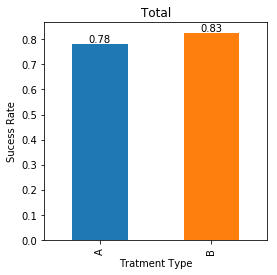

In [3]:
# Analisando os valores totais, podemos concluir que o tratamento B é mais bem sucedido que o tratamento A.

df_stone_size = df.groupby('kidney_stone_size').sum()
df_stone_size['rate'] = df_stone_size.recovery/df_stone_size.total

list = df_stone_size['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_stone_size['rate'].plot(kind='bar')
ax.set_title('Total')
ax.set_xlabel('Tratment Type')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')

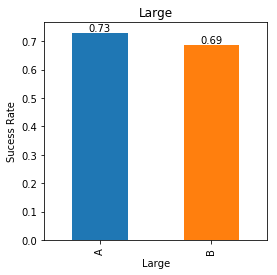

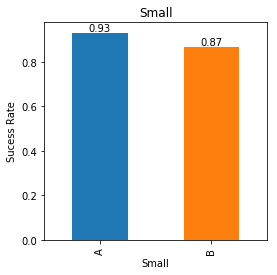

In [5]:
#Por outro lado, analisando as parciais para os tipos de tamanho de pedra, constatamos que o tratamento A é mais bem sucedido que o tratamento B.

df_large = df[df.treatment == 'large']
df_large = df_large.set_index('kidney_stone_size')
df_large['rate'] = df_large.recovery/df_large.total

list = df_large['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_large['rate'].plot(kind='bar')
ax.set_title('Large')
ax.set_xlabel('Large')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')
    
df_small = df[df.treatment == 'small']
df_small = df_small.set_index('kidney_stone_size')
df_small['rate'] = df_small.recovery/df_small.total

list = df_small['rate'].tolist()
rounded_list = [round(elem, 2) for elem in list]

plt.figure(figsize=(4,4))
ax = df_small['rate'].plot(kind='bar')
ax.set_title('Small')
ax.set_xlabel('Small')
ax.set_ylabel('Sucess Rate')

rects = ax.patches

# Make some labels.
labels = [rounded_list[i] for i in range(len(rounded_list))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label,
            ha='center', va='bottom')

## Modelo para detecção do Paradoxo de Simpson, para o tratamento de pedras nos rins

In [7]:
# detect simpson's paradox
import numpy as np
import pandas as pd


def aggregate_data(df, conversion_col, treatment_col, segment_col):
    """
    takes table of individual level data and aggregates it for simpsons paradox detection.
    conversion_col is 1 if success, 0 else. 
    ex:
    pd.DataFrame([
        ['small', 'A', 1],
        ['small', 'B', 0],
        ['large', 'A', 1],
        ['small', 'A', 1],
        ['large', 'B', 0],
        ['large', 'B', 0],
    ], columns=['kidney_stone_size', 'treatment', 'recovery'])   
    """
    df_ = df[[conversion_col, treatment_col, segment_col]]
    gb = df_.groupby([segment_col, treatment_col]).agg(
        [np.sum, lambda x: len(x)])
    gb.columns = [conversion_col, "total"]

    return gb.reset_index()


def simpsons_paradox(df, conversion_col, total_col, treatment_col, segment_col):
    """
    given a dataframe like:
        pd.DataFrame([
            ['small', 'A', 81, 87],
            ['small', 'B', 234, 270],
            ['large', 'A', 192, 263],
            ['large', 'B', 55, 80],
        ], columns=['kidney_stone_size', 'treatment', 'recovery', 'total'])   
    will determine if simpsons paradox exists. Non Bayesian!
    > simpsons_paradox( df, 'recovery', 'total', 'treatment', 'kidney_stone_size' )    
    """

    # find global optimal:
    gbs = df.groupby(treatment_col).sum()
    print ("## Global rates: ")
    print (gbs[conversion_col] / gbs[total_col])
    print
    global_optimal = (gbs[conversion_col] / gbs[total_col]).argmax()

    # check optimal via segments
    df_ = df.set_index([segment_col, treatment_col])
    rates = (df_[conversion_col] / df_[total_col]).unstack(-1)
    print ("## Local rates:")
    print (rates)
    print
    # find the local optimals
    local_optimals = rates.apply(lambda x: x.argmax(), 1)

    if local_optimals.unique().shape[0] > 1:
        print ("## Simpsons paradox not detected.")
        print ("## Segmented rates do not have a consistent optimal choice")
        print ("## Local optimals:")
        print (local_optimals)
        print ("## Global optimal: ", global_optimal)
        return False

    local_optimal = local_optimals.unique()[0]

    print ("## Global optimal: ", global_optimal)
    print ("## Local optimal: ", local_optimal)
    if local_optimal != global_optimal:
        print ("## Simpsons Paradox detected.")
        return True

    else:
        print ("## Simpsons paradox not detected.")
        return False


if __name__ == "__main__":
    # create some data, indentical to the data at
    # http://en.wikipedia.org/wiki/Simpsons_paradox
    d = []
    d += ([('A', 'small', 1)] * 81)
    d += ([('A', 'small', 0)] * (87 - 81))
    d += ([('B', 'small', 0)] * (270 - 234))
    d += ([('B', 'small', 1)] * (234))
    d += ([('B', 'large', 1)] * (55))
    d += ([('B', 'large', 0)] * (80 - 55))
    d += ([('A', 'large', 0)] * (263 - 192))
    d += ([('A', 'large', 1)] * (192))

    df = pd.DataFrame(
        d, columns=['treatment', 'kidney_stone_size', 'recovery'])
    gb = aggregate_data(df, 'recovery', 'treatment', 'kidney_stone_size')

In [8]:
simpsons_paradox(gb, 'recovery', 'total', 'treatment', 'kidney_stone_size')

## Global rates: 
treatment
A    0.780000
B    0.825714
dtype: float64
## Local rates:
treatment                 A         B
kidney_stone_size                    
large              0.730038  0.687500
small              0.931034  0.866667
## Global optimal:  B
## Local optimal:  A
## Simpsons Paradox detected.


True